# Histogram and Intensity Transformations

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram.

[Histograms - 1: Find, Plot, Analyze](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)

[Histograms - 2: Histogram Equalization](https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html)

## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading the Image

Recall that Matplotlib expects the images in an RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original BGR ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

In [2]:
img = cv2.imread("../DATA/road_image.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Histograms

We use `cv2.calcHist` function to find the histogram.

---

`cv2.calcHist(List[Mat] images, List[int] channels, Mat mask, List[int] histSize, List[int] ranges, Mat hist=None, bool accumulate=False])`

**Description:** Calculates a histogram of a set of arrays.

**Parameters:**

`images`: Source arrays. They all should have the same depth and the same size. 

`channels`: List of the dims channels used to compute the histogram.

`mask`: Optional mask. If the matrix is not empty, it must be an 8-bit array of the same size as images[i].

`histSize`: Array of histogram sizes in each dimension.

`ranges`: Array of the dims arrays of the histogram bin boundaries in each dimension. 

`hist`: Output histogram.

`accumulate`: Accumulation flag. If it is set, the histogram is not cleared in the beginning when it is allocated.

**Return Value:** It returns an array of histogram points of dtype float32.

---

### Grayscale Histograms

Histograms are used in grayscale images. Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications.

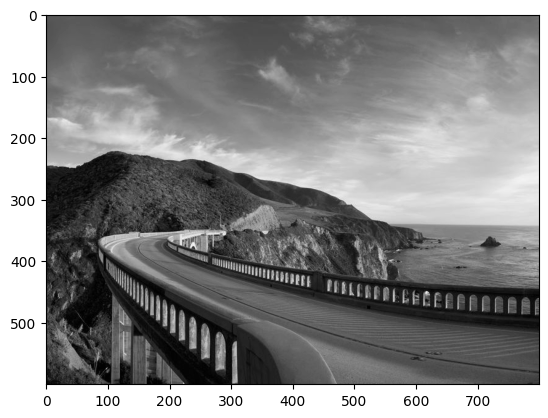

In [3]:
plt.imshow(gray_img, cmap="gray")

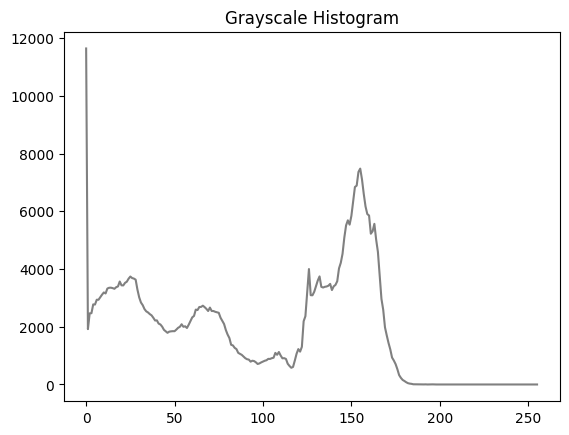

In [4]:
hist_values = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) 
plt.title("Grayscale Histogram")
plt.plot(hist_values, color="gray")

### Color Histograms

We can also apply a histogram to each image color channel.

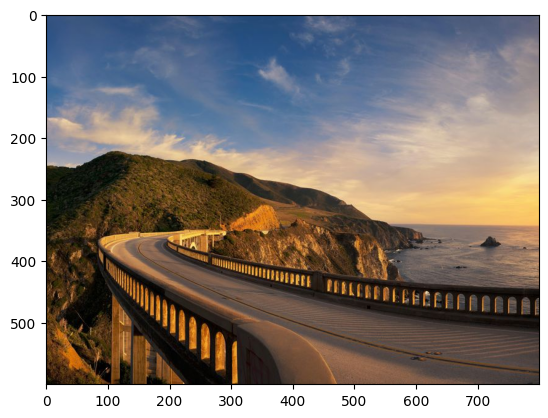

In [5]:
plt.imshow(rgb_img)

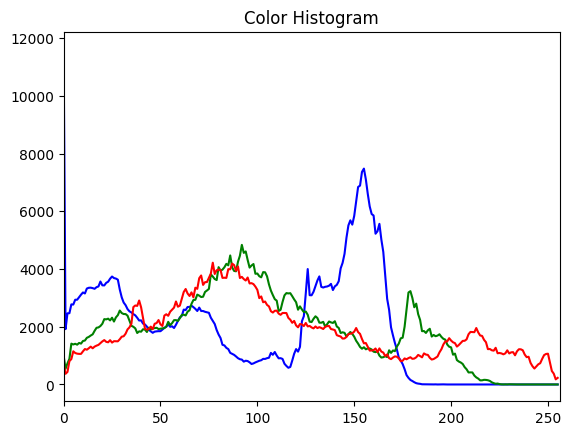

In [6]:
color = ["b", "g", "r"]

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title("Color Histogram")
plt.show()

## Histogram Equalization

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends and that is what histogram equalization does. This normally improves the contrast of the image. We simply apply the function `cv2.equalizeHist`.

---

`cv2.equalizeHist(Mat src, Mat dst=None)`

**Description:** Equalizes the histogram of a grayscale image.

**Parameters:**

`src`: Source 8-bit single channel image.

`dst`: Destination image of the same size and type as src.

**Return Value:** It returns the equalized image.

---

### Equalized image

In [7]:
eq_gray_img = cv2.equalizeHist(gray_img)

Text(0.5, 1.0, 'Equalized gray image')

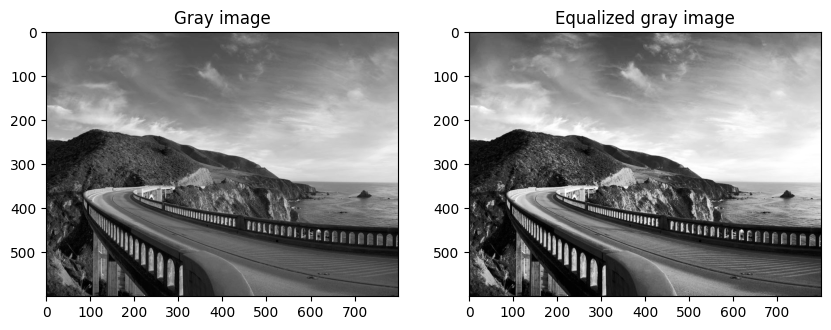

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Gray image")
ax[1].imshow(eq_gray_img, cmap="gray")
ax[1].set_title("Equalized gray image")

### Equalized image histogram

In [9]:
eq_hist_values = cv2.calcHist([eq_gray_img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'Equalized gray image histogram')

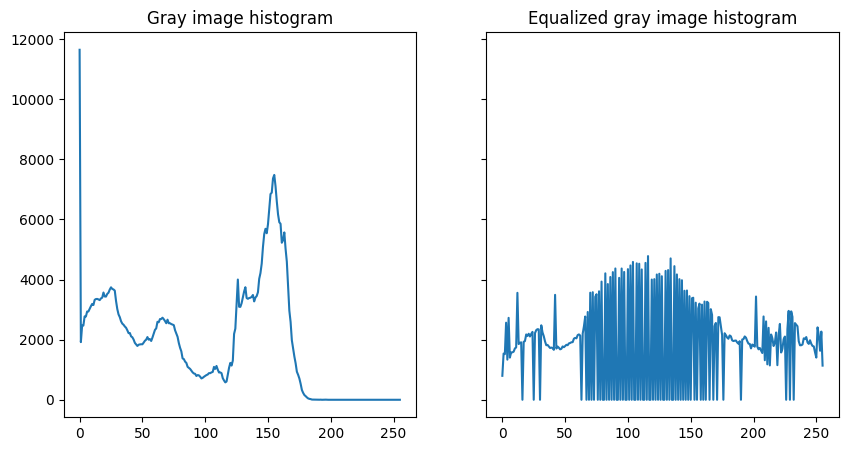

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax[0].plot(hist_values)
ax[0].set_title("Gray image histogram")
ax[1].plot(eq_hist_values)
ax[1].set_title("Equalized gray image histogram")

##  Intensity Transformations

Intensity transformations are among the simplest of all image processing techniques. Approaches whose results depend only on the intensity at a point are called point processing techniques or Intensity transformation techniques. 

It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 

$$
g(x,y)=T(f(x,y))
$$

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The new output s is given by:

$$
s=T(r)
$$

### Image Negatives

Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad or \qquad s=255-r
$$

In [11]:
neg_gray_img = 255 - gray_img

Text(0.5, 1.0, 'Gray image negative')

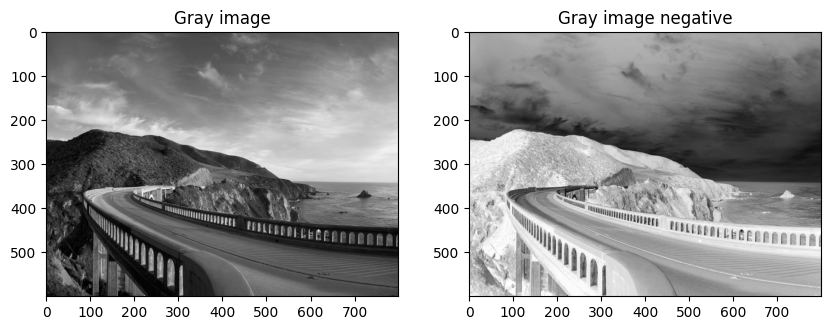

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Gray image")
ax[1].imshow(neg_gray_img, cmap="gray")
ax[1].set_title("Gray image negative")

### Brightness and Contrast Adjustments

We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.

Rather than implementing via array operations, we use the function `cv2.convertScaleAbs`. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between $[0,255]$.

---

`cv2.convertScaleAbs(Mat src, Mat dst, double alpha=1, double beta=0)`

**Description:** Scales, calculates absolute values, and converts the result to 8-bit.

**Parameters:**

`src`: Source 8-bit single channel image.

`dst`: Destination image of the same size and type as src.

`alpha`: Optional scale factor.

`beta`: Optional delta added to the scaled values.

**Return Value:** It returns the converted image.

---

#### Brightness Control

For brightness control, we can set $\alpha$ to 1 and $\beta$ to 100

In [13]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
bright_gray_img = cv2.convertScaleAbs(gray_img, alpha=alpha, beta=beta)

Text(0.5, 1.0, 'Bright gray image')

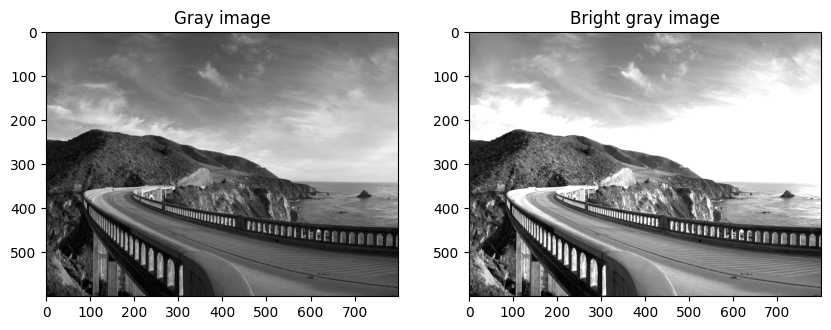

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Gray image")
ax[1].imshow(bright_gray_img, cmap="gray")
ax[1].set_title("Bright gray image")

In [15]:
bright_hist_values = cv2.calcHist([bright_gray_img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'Bright gray image histogram')

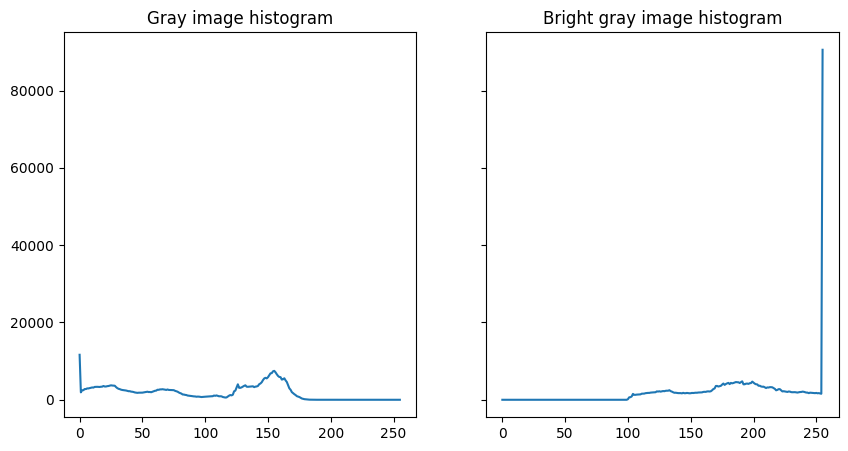

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax[0].plot(hist_values)
ax[0].set_title("Gray image histogram")
ax[1].plot(bright_hist_values)
ax[1].set_title("Bright gray image histogram")

#### Contrast Control

We can increase the contrast by increasing $\alpha$.

In [17]:
alpha = 2 # Simple contrast control
beta = 0 # Simple brightness control
contrast_gray_img = cv2.convertScaleAbs(gray_img, alpha=alpha, beta=beta)

Text(0.5, 1.0, 'Contrast gray image')

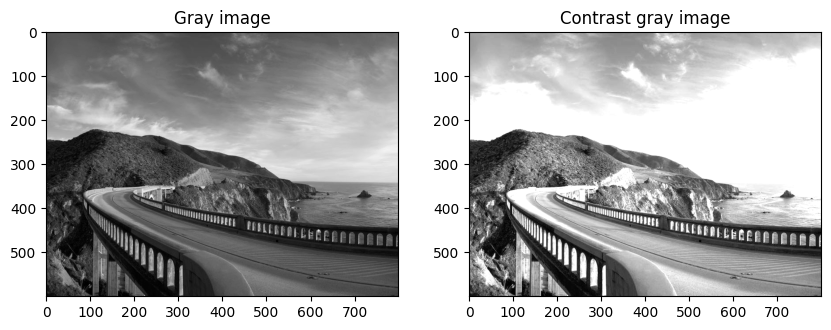

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Gray image")
ax[1].imshow(contrast_gray_img, cmap="gray")
ax[1].set_title("Contrast gray image")

In [19]:
contrast_hist_values = cv2.calcHist([contrast_gray_img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'Contrast gray image histogram')

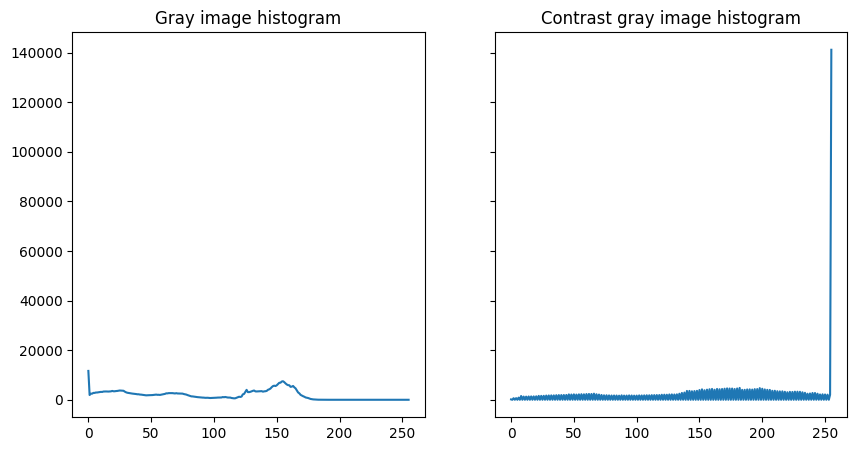

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax[0].plot(hist_values)
ax[0].set_title("Gray image histogram")
ax[1].plot(contrast_hist_values)
ax[1].set_title("Contrast gray image histogram")